In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR="/mnt/Data/data"

In [3]:
import pandas as pd
from pathlib import Path
import pickle
import numpy as np

In [4]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [5]:
relative_paths=["results/lcadc_adcout_20kHz_6000_5u_5.simplified.vcsv",
                "results/lcadc_adcout_20kHz_1000_5u_5.simplified.vcsv",
                "results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv",
                "results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv",
                "results/lcadc_neoabs_20kHz_6000_5u_5.simplified.vcsv",
                "results/lcadc_neoabs_20kHz_1000_5u_5.simplified.vcsv",
                "results/lcadc_adcout_20kHz_6000_25u_5.simplified.vcsv",
                "results/lcadc_adcout_20kHz_1000_25u_5.simplified.vcsv",
                "results/lcadc_neo_20kHz_6000_25u_5.simplified.vcsv",
                "results/lcadc_neo_20kHz_1000_25u_5.simplified.vcsv",
                "results/lcadc_neoabs_20kHz_6000_25u_5.simplified.vcsv",
                "results/lcadc_neoabs_20kHz_1000_25u_5.simplified.vcsv"
               ]

In [6]:
def process_filename(filename):
    basename=filename.split("/")[-1].split(".")[0]
    tokens=basename.split("_")
    return {
        "adc_type":tokens[0],
        "result_type":tokens[1],
        "bw":tokens[3],
        "noise_level":tokens[4].rstrip("u"),
        "chunk_idx":tokens[5]
    }

In [7]:
filepath=Path(SIMULATION_OUTPUT) / relative_paths[0]

In [8]:
process_filename(relative_paths[0])

{'adc_type': 'lcadc',
 'result_type': 'adcout',
 'bw': '6000',
 'noise_level': '5',
 'chunk_idx': '5'}

In [9]:
gdf=pd.DataFrame(data={"relative_path":relative_paths})
gdf["filepath"]=gdf["relative_path"].apply(lambda x: Path(SIMULATION_OUTPUT)/x)
infodf=gdf["relative_path"].apply(process_filename).apply(pd.Series)
gdf=gdf.assign(**infodf)
gdf

/tmp/ipykernel_933273/1434316636.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  infodf=gdf["relative_path"].apply(process_filename).apply(pd.Series)


,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5


In [10]:
gdf["df"]=gdf["filepath"].apply(lambda x: pd.read_csv(x, comment=';', header=None, 
                 names=["time_VOUT", "VOUT"]))
gdf

,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx,df
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5,time_VOUT VOUT 0 0.000000 0.0...
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5,time_VOUT VOUT 0 0.000000 0.0...
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5,time_VOUT VOUT 0 0.000000 0.0...
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5,time_VOUT VOUT 0 0.000000 0.0...
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5,time_VOUT VOUT 0 0.000000 0.0...
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5,time_VOUT VOUT 0 0.000000 0.0...
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5,time_VOUT VOUT 0 0.000000 0...
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5,time_VOUT VOUT 0 0.000000 0...
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5,time_VOUT VOUT 0 0.000000 0...
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5,time_VOUT VOUT 0 0.000000 0...


In [11]:
df = gdf.iloc[0]["df"]
df

,time_VOUT,VOUT
0,0.000000,0.000000
1,0.000796,-0.004687
2,0.000987,0.000000
3,0.001108,-0.004687
4,0.001392,0.000000
...,...,...
3504,1.000461,0.000000
3505,1.000684,0.004687
3506,1.000762,0.000000
3507,1.000867,0.004687


In [12]:
df["time_diff"] = df["time_VOUT"].shift(periods=-1) - df["time_VOUT"]
df

,time_VOUT,VOUT,time_diff
0,0.000000,0.000000,0.000796
1,0.000796,-0.004687,0.000191
2,0.000987,0.000000,0.000120
3,0.001108,-0.004687,0.000285
4,0.001392,0.000000,0.000051
...,...,...,...
3504,1.000461,0.000000,0.000223
3505,1.000684,0.004687,0.000078
3506,1.000762,0.000000,0.000105
3507,1.000867,0.004687,0.000068


In [13]:
df.loc[df["time_diff"]==np.max(df.dropna()["time_diff"].values)]

,time_VOUT,VOUT,time_diff
2597,0.746186,0.0,0.010828


In [14]:
import matplotlib.pylab as plt

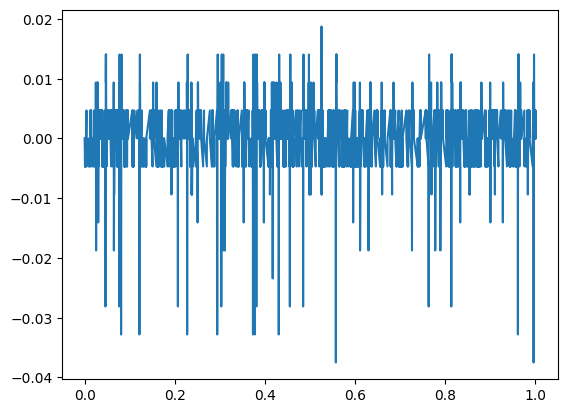

In [15]:
plt.plot(df["time_VOUT"],df["VOUT"])

Requires `python-pytables` and `python-neo`

In [16]:
fdf = pd.read_hdf(Path(BASE_DIR) / "results_filtered.h5")

In [17]:
fdf.columns

Index(['fs', 'noise_level', 'resolution', 'bw', 'is_lcadc', 'neo_file',
       'adcinfo', 'channels', 'indexes', 'normalized', 'w', 'neo',
       'recordings', 'spiketrains', 'timestamps', 'l_limit_idx', 'h_limit_idx',
       'l_limit', 'h_limit', 'chunk_idx', 'spiketrain_chunk',
       'recording_chunk', 'spike_indexes', 'evaluation_file', 'type',
       'results', 'spiketrain_idx', 'accuracy', 'max_accuracy'],
      dtype='object')

In [18]:
osel=fdf.loc[(fdf["noise_level"].isin([5,25]))&
            (fdf["chunk_idx"]==5)
           ].copy()
osel.head()

,fs,noise_level,resolution,bw,is_lcadc,neo_file,adcinfo,channels,indexes,normalized,...,chunk_idx,spiketrain_chunk,recording_chunk,spike_indexes,evaluation_file,type,results,spiketrain_idx,accuracy,max_accuracy
10,20000,5,6,1000,True,/mnt/Data/data/output-bw-300-1000/preprocessor...,"{'resolution': 6, 'voltage_ref': 500}",27,"[0, 62, 72, 95, 104, 106, 115, 119, 124, 130, ...","[0.0, -0.03125, 0.0, 0.03125, -0.03125, -0.125...",...,5,"[5.042018754991749 s, 5.0723475816028225 s, 5....","[-2.3915215, -0.30214286, -2.460304, -0.926220...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/mnt/Data/data/output-bw-300-1000/evaluator_lc...,recordings,"[{'truepositive': 20, 'falsepositive': 382, 'f...",8,"[0.04975124378109453, 0.04975124378109453, 0.0...",0.95
11,20000,5,6,1000,True,/mnt/Data/data/output-bw-300-1000/preprocessor...,"{'resolution': 6, 'voltage_ref': 500}",27,"[0, 62, 72, 95, 104, 106, 115, 119, 124, 130, ...","[0.0, -0.03125, 0.0, 0.03125, -0.03125, -0.125...",...,5,"[5.042018754991749 s, 5.0723475816028225 s, 5....","[-2.3915215, -0.30214286, -2.460304, -0.926220...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/mnt/Data/data/output-bw-300-1000/evaluator_lc...,normalized,"[{'truepositive': 20, 'falsepositive': 153, 'f...",8,"[0.11560693641618497, 0.12738853503184713, 0.1...",0.95
30,20000,5,6,1000,False,/mnt/Data/data/output-bw-300-1000/preprocessor...,"{'resolution': 6, 'voltage_ref': 500}",27,NaN,"[0.0, 0.0, 0.0, -0.03125, -0.03125, 0.0, 0.0, ...",...,5,"[5.042018754991749 s, 5.0723475816028225 s, 5....","[-2.3915215, -0.30214286, -2.460304, -0.926220...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/mnt/Data/data/output-bw-300-1000/evaluator/th...,recordings,"[{'truepositive': 20, 'falsepositive': 382, 'f...",8,"[0.04975124378109453, 0.04975124378109453, 0.0...",0.95
31,20000,5,6,1000,False,/mnt/Data/data/output-bw-300-1000/preprocessor...,"{'resolution': 6, 'voltage_ref': 500}",27,NaN,"[0.0, 0.0, 0.0, -0.03125, -0.03125, 0.0, 0.0, ...",...,5,"[5.042018754991749 s, 5.0723475816028225 s, 5....","[-2.3915215, -0.30214286, -2.460304, -0.926220...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/mnt/Data/data/output-bw-300-1000/evaluator/th...,normalized,"[{'truepositive': 20, 'falsepositive': 382, 'f...",8,"[0.04975124378109453, 0.04975124378109453, 0.0...",0.95
50,20000,5,6,6000,True,/mnt/Data/data/output/preprocessor_lcadc/prepr...,"{'resolution': 6, 'voltage_ref': 500}",27,"[0, 3, 5, 14, 16, 17, 33, 34, 62, 65, 68, 72, ...","[0.0, -0.03125, 0.0, 0.03125, -0.03125, 0.0, -...",...,5,"[5.042018754991749 s, 5.0723475816028225 s, 5....","[-1.7708632, -0.45143175, -2.8862457, -1.63307...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",/mnt/Data/data/output/evaluator_lcadc/threshol...,recordings,"[{'truepositive': 20, 'falsepositive': 382, 'f...",8,"[0.04975124378109453, 0.04975124378109453, 0.0...",0.95


In [19]:
ref=osel[["l_limit_idx","h_limit_idx","l_limit","h_limit"]].drop_duplicates()
print(ref)
t_length=ref["h_limit"].values[0]-ref["l_limit"].values[0]
t_length

    l_limit_idx  h_limit_idx  l_limit  h_limit
10        99915       119995  4.99575  5.99975


1.0039999999999996

In [20]:
o_samples=ref["h_limit_idx"].values[0]-ref["l_limit_idx"].values[0]
o_samples+1

20081

In [21]:
def extract_info(df,t_length):
    df["time_diff"] = df["time_VOUT"].shift(periods=-1) - df["time_VOUT"]
    sel=df.loc[df["time_VOUT"]<=t_length]
    return {"df":sel,
        **sel["time_diff"].describe().to_dict()}

In [22]:
extract_info(df,t_length)

{'df':       time_VOUT      VOUT  time_diff
 0      0.000000  0.000000   0.000796
 1      0.000796 -0.004687   0.000191
 2      0.000987  0.000000   0.000120
 3      0.001108 -0.004687   0.000285
 4      0.001392  0.000000   0.000051
 ...         ...       ...        ...
 3504   1.000461  0.000000   0.000223
 3505   1.000684  0.004687   0.000078
 3506   1.000762  0.000000   0.000105
 3507   1.000867  0.004687   0.000068
 3508   1.000935  0.000000        NaN
 
 [3509 rows x 3 columns],
 'count': 3508.0,
 'mean': 0.00028532937497530755,
 'std': 0.0007611865301313664,
 'min': 1.2514725095114088e-07,
 '25%': 5.2540138077962484e-05,
 '50%': 0.00010219858422419459,
 '75%': 0.0002008397153601682,
 'max': 0.010828201611104427}

In [23]:
info=gdf["df"].apply(lambda x: extract_info(x,t_length)).apply(pd.Series)
ngdf=gdf.drop(columns=["df"]).assign(**info)
ngdf

/tmp/ipykernel_933273/345354364.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  info=gdf["df"].apply(lambda x: extract_info(x,t_length)).apply(pd.Series)


,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx,df,count,mean,std,min,25%,50%,75%,max
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5,time_VOUT VOUT time_diff 0 0....,3508.0,0.000285,0.000761,1.251473e-07,0.000053,0.000102,0.000201,0.010828
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5,time_VOUT VOUT time_diff 0 0....,2413.0,0.000416,0.000943,1.264829e-07,0.000054,0.000105,0.000278,0.012048
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5,time_VOUT VOUT time_diff 0 0....,2485.0,0.000403,0.000922,1.404053e-07,0.000061,0.000120,0.000278,0.011315
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5,time_VOUT VOUT time_diff 0 0....,1705.0,0.000589,0.001163,1.590723e-07,0.000064,0.000134,0.000422,0.012141
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5,time_VOUT VOUT time_diff 0 0....,2269.0,0.000441,0.000982,1.404428e-07,0.000060,0.000121,0.000283,0.011315
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5,time_VOUT VOUT time_diff 0 0....,1645.0,0.000610,0.001192,1.590723e-07,0.000066,0.000134,0.000438,0.012141
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5,time_VOUT VOUT time_diff 0 ...,34289.0,0.000029,0.000026,4.933103e-07,0.000014,0.000021,0.000035,0.000470
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5,time_VOUT VOUT time_diff 0 ...,24468.0,0.000041,0.000036,2.543738e-07,0.000018,0.000029,0.000051,0.000436
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5,time_VOUT VOUT time_diff 0 ...,28087.0,0.000036,0.000037,4.932615e-07,0.000014,0.000023,0.000042,0.000655
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5,time_VOUT VOUT time_diff 0 ...,18607.0,0.000054,0.000059,2.542815e-07,0.000020,0.000033,0.000066,0.000816


In [24]:
ngdf.columns

Index(['relative_path', 'filepath', 'adc_type', 'result_type', 'bw',
       'noise_level', 'chunk_idx', 'df', 'count', 'mean', 'std', 'min', '25%',
       '50%', '75%', 'max'],
      dtype='object')

In [25]:
columns=['adc_type', 'result_type', 'bw',
       'noise_level', 'count', 'mean', 'std', 'min', 
       '50%', 'max']

In [26]:
ngdf[columns]

,adc_type,result_type,bw,noise_level,count,mean,std,min,50%,max
0,lcadc,adcout,6000,5,3508.0,0.000285,0.000761,1.251473e-07,0.000102,0.010828
1,lcadc,adcout,1000,5,2413.0,0.000416,0.000943,1.264829e-07,0.000105,0.012048
2,lcadc,neo,6000,5,2485.0,0.000403,0.000922,1.404053e-07,0.000120,0.011315
3,lcadc,neo,1000,5,1705.0,0.000589,0.001163,1.590723e-07,0.000134,0.012141
4,lcadc,neoabs,6000,5,2269.0,0.000441,0.000982,1.404428e-07,0.000121,0.011315
5,lcadc,neoabs,1000,5,1645.0,0.000610,0.001192,1.590723e-07,0.000134,0.012141
6,lcadc,adcout,6000,25,34289.0,0.000029,0.000026,4.933103e-07,0.000021,0.000470
7,lcadc,adcout,1000,25,24468.0,0.000041,0.000036,2.543738e-07,0.000029,0.000436
8,lcadc,neo,6000,25,28087.0,0.000036,0.000037,4.932615e-07,0.000023,0.000655
9,lcadc,neo,1000,25,18607.0,0.000054,0.000059,2.542815e-07,0.000033,0.000816


In [27]:
print(ngdf[columns].to_latex(index=False,formatters={"count": "{:.0f}".format, "min": "{:.4e}".format,}))

\begin{tabular}{llllrrrrrr}
\toprule
adc_type & result_type & bw & noise_level & count & mean & std & min & 50% & max \\
\midrule
lcadc & adcout & 6000 & 5 & 3508 & 0.000285 & 0.000761 & 1.2515e-07 & 0.000102 & 0.010828 \\
lcadc & adcout & 1000 & 5 & 2413 & 0.000416 & 0.000943 & 1.2648e-07 & 0.000105 & 0.012048 \\
lcadc & neo & 6000 & 5 & 2485 & 0.000403 & 0.000922 & 1.4041e-07 & 0.000120 & 0.011315 \\
lcadc & neo & 1000 & 5 & 1705 & 0.000589 & 0.001163 & 1.5907e-07 & 0.000134 & 0.012141 \\
lcadc & neoabs & 6000 & 5 & 2269 & 0.000441 & 0.000982 & 1.4044e-07 & 0.000121 & 0.011315 \\
lcadc & neoabs & 1000 & 5 & 1645 & 0.000610 & 0.001192 & 1.5907e-07 & 0.000134 & 0.012141 \\
lcadc & adcout & 6000 & 25 & 34289 & 0.000029 & 0.000026 & 4.9331e-07 & 0.000021 & 0.000470 \\
lcadc & adcout & 1000 & 25 & 24468 & 0.000041 & 0.000036 & 2.5437e-07 & 0.000029 & 0.000436 \\
lcadc & neo & 6000 & 25 & 28087 & 0.000036 & 0.000037 & 4.9326e-07 & 0.000023 & 0.000655 \\
lcadc & neo & 1000 & 25 & 18607 & 0.

In [28]:
int(np.round(np.log2(0.000102/5e-7)))

8

In [29]:
1/1.25e-7

8000000.0

In [30]:
gdf["df"].iloc[0]

,time_VOUT,VOUT,time_diff
0,0.000000,0.000000,0.000796
1,0.000796,-0.004687,0.000191
2,0.000987,0.000000,0.000120
3,0.001108,-0.004687,0.000285
4,0.001392,0.000000,0.000051
...,...,...,...
3504,1.000461,0.000000,0.000223
3505,1.000684,0.004687,0.000078
3506,1.000762,0.000000,0.000105
3507,1.000867,0.004687,0.000068


In [31]:
tdf=gdf["df"].iloc[0][["time_VOUT","VOUT"]].copy()

In [32]:
tdf["time_VOUT"]=pd.to_timedelta(tdf["time_VOUT"], unit='S')

In [33]:
ntdf=tdf.resample("0.5us",on="time_VOUT").first().ffill()
ntdf.head()

,VOUT
time_VOUT,
0 days 00:00:00,0.0
0 days 00:00:00.000000500,0.0
0 days 00:00:00.000001,0.0
0 days 00:00:00.000001500,0.0
0 days 00:00:00.000002,0.0


In [34]:
ntdf["time"]=pd.to_numeric(ntdf.index)/1e9
ntdf

,VOUT,time
time_VOUT,,
0 days 00:00:00,0.000000,0.000000e+00
0 days 00:00:00.000000500,0.000000,5.000000e-07
0 days 00:00:00.000001,0.000000,1.000000e-06
0 days 00:00:00.000001500,0.000000,1.500000e-06
0 days 00:00:00.000002,0.000000,2.000000e-06
...,...,...
0 days 00:00:01.000933,0.004687,1.000933e+00
0 days 00:00:01.000933500,0.004687,1.000933e+00
0 days 00:00:01.000934,0.004687,1.000934e+00


In [35]:
len(ntdf)

2001871

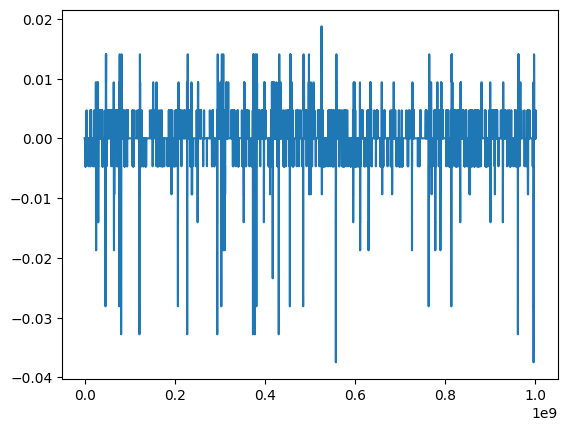

In [36]:
plt.plot(ntdf.index,ntdf["VOUT"])

In [37]:
np.sqrt(np.mean(ntdf["VOUT"].values**2))

0.00364257385647086

In [38]:
scales=np.linspace(1,12,23)
scales

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. ])

In [39]:
thdf=pd.DataFrame(data=scales, columns=["scale"])
thdf["th"]=np.sqrt(np.mean(ntdf["VOUT"].values**2))*thdf["scale"]
thdf

,scale,th
0,1.0,0.003643
1,1.5,0.005464
2,2.0,0.007285
3,2.5,0.009106
4,3.0,0.010928
5,3.5,0.012749
6,4.0,0.014570
7,4.5,0.016392
8,5.0,0.018213
9,5.5,0.020034


In [40]:
sel_spiketrain=np.asarray(osel["spiketrain_chunk"].iloc[0]) - osel["l_limit"].iloc[0]
sel_spiketrain

array([0.04626875, 0.07659758, 0.08098192, 0.12164449, 0.20702141,
       0.22764453, 0.29439328, 0.30337931, 0.37365928, 0.37782099,
       0.38120217, 0.43090772, 0.45555495, 0.48502622, 0.55761658,
       0.76367546, 0.81399383, 0.90062151, 0.96175709, 0.99657123])

In [41]:
from eapprocessor.evaluator.spikes import estimate_sample_spikes, comparison_detection_spiketrain

In [42]:
spike_indexes, err_list=estimate_sample_spikes(spikes=sel_spiketrain,timestamps=ntdf["time"])

In [43]:
len(spike_indexes)

2001871

In [44]:
ntdf["spikes"]=spike_indexes
ntdf

,VOUT,time,spikes
time_VOUT,,,
0 days 00:00:00,0.000000,0.000000e+00,0.0
0 days 00:00:00.000000500,0.000000,5.000000e-07,0.0
0 days 00:00:00.000001,0.000000,1.000000e-06,0.0
0 days 00:00:00.000001500,0.000000,1.500000e-06,0.0
0 days 00:00:00.000002,0.000000,2.000000e-06,0.0
...,...,...,...
0 days 00:00:01.000933,0.004687,1.000933e+00,0.0
0 days 00:00:01.000933500,0.004687,1.000933e+00,0.0
0 days 00:00:01.000934,0.004687,1.000934e+00,0.0


In [45]:
def process_th(df,th):
    ndf=df.copy()
    ndf["th"]=th
    #ndf["over_th"]= ndf.apply(lambda x: 1 if np.abs(x["VOUT"])>=x["th"] else 0,axis=1)
    ndf["over_th"]= np.abs(ndf["VOUT"])>=ndf["th"]
    ndf["over_th"]=ndf["over_th"].astype(int)
    return ndf

Testing with one threshold

In [46]:
tsdf=process_th(ntdf,0.003643)
tsdf

,VOUT,time,spikes,th,over_th
time_VOUT,,,,,
0 days 00:00:00,0.000000,0.000000e+00,0.0,0.003643,0
0 days 00:00:00.000000500,0.000000,5.000000e-07,0.0,0.003643,0
0 days 00:00:00.000001,0.000000,1.000000e-06,0.0,0.003643,0
0 days 00:00:00.000001500,0.000000,1.500000e-06,0.0,0.003643,0
0 days 00:00:00.000002,0.000000,2.000000e-06,0.0,0.003643,0
...,...,...,...,...,...
0 days 00:00:01.000933,0.004687,1.000933e+00,0.0,0.003643,1
0 days 00:00:01.000933500,0.004687,1.000933e+00,0.0,0.003643,1
0 days 00:00:01.000934,0.004687,1.000934e+00,0.0,0.003643,1


In [47]:
fs=2e6
window_time=2.5e-3
comparison_detection_spiketrain(reference=tsdf["spikes"],test=tsdf["over_th"],window=int(window_time * fs))

{'truepositive': 20,
 'falsepositive': 314,
 'falsenegative': 0,
 'truenegative': 67}

Applying to all threshold levels

In [48]:
thdf["df"]=[ntdf]*len(thdf)

In [49]:
thdf

,scale,th,df
0,1.0,0.003643,VOUT t...
1,1.5,0.005464,VOUT t...
2,2.0,0.007285,VOUT t...
3,2.5,0.009106,VOUT t...
4,3.0,0.010928,VOUT t...
5,3.5,0.012749,VOUT t...
6,4.0,0.014570,VOUT t...
7,4.5,0.016392,VOUT t...
8,5.0,0.018213,VOUT t...
9,5.5,0.020034,VOUT t...


In [50]:
thdf["dfp"]=thdf.apply(lambda x: process_th(x["df"],x["th"]),axis=1)

In [51]:
thdf["results"]=thdf.apply(lambda x: comparison_detection_spiketrain(
   reference=x["dfp"]["spikes"],test=x["dfp"]["over_th"],window=int(window_time * fs)),axis=1)

In [52]:
thdf

,scale,th,df,dfp,results
0,1.0,0.003643,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 314, 'fa..."
1,1.5,0.005464,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal..."
2,2.0,0.007285,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal..."
3,2.5,0.009106,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal..."
4,3.0,0.010928,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 27, 'fal..."
5,3.5,0.012749,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 27, 'fal..."
6,4.0,0.014570,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal..."
7,4.5,0.016392,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal..."
8,5.0,0.018213,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal..."
9,5.5,0.020034,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 1, 'fals..."


In [53]:
from eapprocessor.evaluator.spikes import calc_accuracy

In [54]:
thdf["accuracy"]=thdf.apply(lambda x: calc_accuracy(x["results"]),axis=1)

In [55]:
thdf

,scale,th,df,dfp,results,accuracy
0,1.0,0.003643,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 314, 'fa...",0.059880
1,1.5,0.005464,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
2,2.0,0.007285,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
3,2.5,0.009106,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
4,3.0,0.010928,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
5,3.5,0.012749,VOUT t...,VOUT t...,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
6,4.0,0.014570,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
7,4.5,0.016392,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
8,5.0,0.018213,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
9,5.5,0.020034,VOUT t...,VOUT t...,"{'truepositive': 19, 'falsepositive': 1, 'fals...",0.904762


In [56]:
def process_df(df,scales):
    tdf= df[["time_VOUT","VOUT"]].copy()
    tdf["time_VOUT"]=pd.to_timedelta(tdf["time_VOUT"], unit='S')
    ntdf=tdf.resample("0.5us",on="time_VOUT").first().ffill()
    ntdf["time"]=pd.to_numeric(ntdf.index)/1e9
    thdf=pd.DataFrame(data=scales, columns=["scale"])
    thdf["th"]=np.sqrt(np.mean(ntdf["VOUT"].values**2))*thdf["scale"]
    spike_indexes, err_list=estimate_sample_spikes(spikes=sel_spiketrain,timestamps=ntdf["time"])
    ntdf["spikes"]=spike_indexes
    thdf["df"]=[ntdf]*len(thdf)
    thdf["dfp"]=thdf.apply(lambda x: process_th(x["df"],x["th"]),axis=1)
    thdf["results"]=thdf.apply(lambda x: comparison_detection_spiketrain(
       reference=x["dfp"]["spikes"],test=x["dfp"]["over_th"],window=int(window_time * fs)),axis=1)
    thdf["accuracy"]=thdf.apply(lambda x: calc_accuracy(x["results"]),axis=1)
    thdf.drop(columns=["df","dfp"],inplace=True)
    return thdf

In [57]:
process_df(gdf["df"].iloc[0],scales)

,scale,th,results,accuracy
0,1.0,0.003643,"{'truepositive': 20, 'falsepositive': 314, 'fa...",0.059880
1,1.5,0.005464,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
2,2.0,0.007285,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
3,2.5,0.009106,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
4,3.0,0.010928,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
5,3.5,0.012749,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
6,4.0,0.014570,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
7,4.5,0.016392,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
8,5.0,0.018213,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
9,5.5,0.020034,"{'truepositive': 19, 'falsepositive': 1, 'fals...",0.904762


In [58]:
gdf["results_df"]=gdf.apply(lambda x: process_df(x["df"],scales),axis=1)

In [59]:
gdf

,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx,df,results_df
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...


In [60]:
import matplotlib.pyplot as plt
from eapprocessor.plot import set_tex_enabled
set_tex_enabled(True)

In [61]:
from eapprocessor.plot import save_figure

FIGURE_FOLDER = "/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/thesis/images"
figure_path = Path(FIGURE_FOLDER)

In [62]:
l_bw=["6000","1000"]
l_noise=["5","25"]
l_types=["adcout","neo","neoabs"]
l_labels=["LCADC", "NEO", "NEO (abs)"]

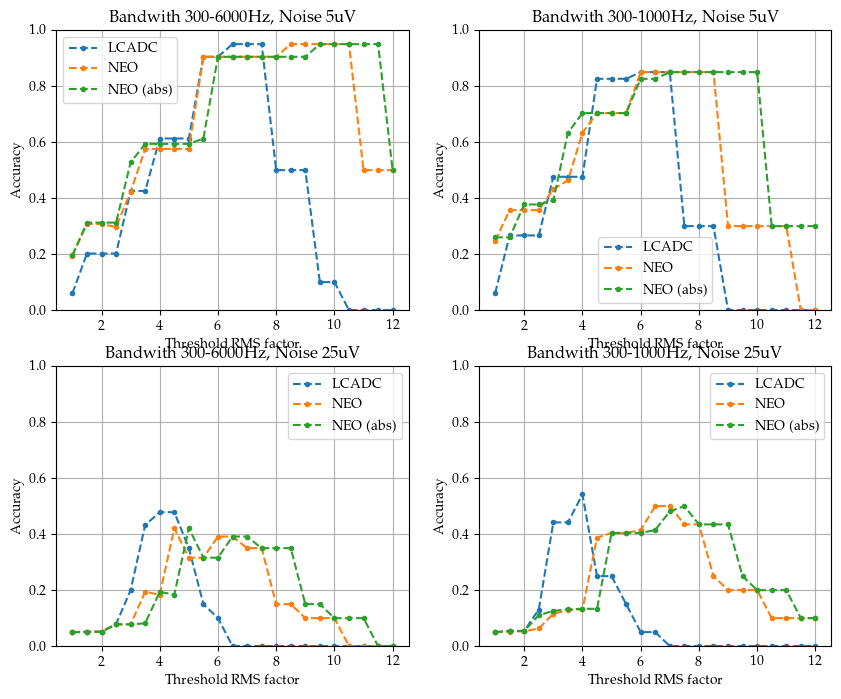

In [63]:
fig=plt.figure(figsize=(10,8))
axes=fig.subplots(ncols=2,nrows=2)

for axh,noise in zip(axes,l_noise):
    for ax,bw in zip(axh,l_bw):
        for r_type, label in zip(l_types,l_labels):
            sel=gdf.loc[(gdf["bw"]==bw)&(gdf["result_type"]==r_type)&(gdf["noise_level"]==noise)].iloc[0]
            ax.plot(sel["results_df"]["scale"],sel["results_df"]["accuracy"],'.--',label=label)
        ax.legend(loc="best")
        ax.grid()
        ax.set_xlabel("Threshold RMS factor")
        ax.set_ylabel("Accuracy")
        ax.set_ylim(0,1)
        ax.set_title(f"Bandwith 300-{bw}Hz, Noise {noise}uV")

In [64]:
save_figure(fig, figure_path / "hw_result_accuracy_vs_noise.pdf")

In [65]:
bw

'1000'

In [66]:
r_type

'neoabs'

In [67]:
tdf=gdf["results_df"].iloc[0]
tdf

,scale,th,results,accuracy
0,1.0,0.003643,"{'truepositive': 20, 'falsepositive': 314, 'fa...",0.059880
1,1.5,0.005464,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
2,2.0,0.007285,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
3,2.5,0.009106,"{'truepositive': 20, 'falsepositive': 79, 'fal...",0.202020
4,3.0,0.010928,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
5,3.5,0.012749,"{'truepositive': 20, 'falsepositive': 27, 'fal...",0.425532
6,4.0,0.014570,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
7,4.5,0.016392,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
8,5.0,0.018213,"{'truepositive': 19, 'falsepositive': 11, 'fal...",0.612903
9,5.5,0.020034,"{'truepositive': 19, 'falsepositive': 1, 'fals...",0.904762


In [68]:
tdf.loc[tdf["accuracy"]==np.max(tdf["accuracy"])].iloc[0].to_dict()

{'scale': 6.5,
 'th': 0.02367673006706059,
 'results': {'truepositive': 19,
  'falsepositive': 0,
  'falsenegative': 1,
  'truenegative': 381},
 'accuracy': 0.95}

In [69]:
gdf["results_max_accuracy"]=gdf.apply(lambda x: 
                                      x["results_df"].loc[
                                          x["results_df"]["accuracy"]==np.max(x["results_df"]["accuracy"])].iloc[0].to_dict(),axis=1)
gdf

,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx,df,results_df,results_max_accuracy
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 6.5, 'th': 0.02367673006706059, 'res..."
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 6.0, 'th': 0.01925901354152701, 'res..."
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 8.5, 'th': 0.00023428522658820757, '..."
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 6.0, 'th': 0.00015309977857305766, '..."
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 9.5, 'th': 0.000232679696451903, 're..."
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,"{'scale': 7.0, 'th': 0.00014997472262683387, '..."
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,"{'scale': 4.0, 'th': 0.03288767010194175, 'res..."
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,"{'scale': 4.0, 'th': 0.025121458023806918, 're..."
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,"{'scale': 4.5, 'th': 0.0002952203943672876, 'r..."
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,"{'scale': 6.5, 'th': 0.0002357131902308355, 'r..."


In [70]:
resdf=gdf["results_max_accuracy"].apply(pd.Series)
rgdf=gdf.drop(columns=["results_max_accuracy"]).assign(**resdf)
resdf=rgdf["results"].apply(pd.Series)
rgdf=rgdf.drop(columns=["results"]).assign(**resdf)
rgdf

/tmp/ipykernel_933273/392298634.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  resdf=gdf["results_max_accuracy"].apply(pd.Series)
/tmp/ipykernel_933273/392298634.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  resdf=rgdf["results"].apply(pd.Series)


,relative_path,filepath,adc_type,result_type,bw,noise_level,chunk_idx,df,results_df,scale,th,accuracy,truepositive,falsepositive,falsenegative,truenegative
0,results/lcadc_adcout_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,6.5,0.023677,0.950000,19,0,1,381
1,results/lcadc_adcout_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,6.0,0.019259,0.850000,17,0,3,382
2,results/lcadc_neo_20kHz_6000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,8.5,0.000234,0.950000,19,0,1,382
3,results/lcadc_neo_20kHz_1000_5u_5.simplified.vcsv,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,6.0,0.000153,0.850000,17,0,3,382
4,results/lcadc_neoabs_20kHz_6000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,6000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,9.5,0.000233,0.950000,19,0,1,382
5,results/lcadc_neoabs_20kHz_1000_5u_5.simplifie...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neoabs,1000,5,5,time_VOUT VOUT time_diff 0 0....,scale th ...,7.0,0.000150,0.850000,17,0,3,382
6,results/lcadc_adcout_20kHz_6000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,4.0,0.032888,0.478261,11,3,9,379
7,results/lcadc_adcout_20kHz_1000_25u_5.simplifi...,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,adcout,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,4.0,0.025121,0.541667,13,4,7,378
8,results/lcadc_neo_20kHz_6000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,6000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,4.5,0.000295,0.421053,16,18,4,364
9,results/lcadc_neo_20kHz_1000_25u_5.simplified....,/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/de...,lcadc,neo,1000,25,5,time_VOUT VOUT time_diff 0 ...,scale th ...,6.5,0.000236,0.500000,13,6,7,376


In [71]:
rgdf.columns

Index(['relative_path', 'filepath', 'adc_type', 'result_type', 'bw',
       'noise_level', 'chunk_idx', 'df', 'results_df', 'scale', 'th',
       'accuracy', 'truepositive', 'falsepositive', 'falsenegative',
       'truenegative'],
      dtype='object')

In [76]:
columns=['bw','noise_level','result_type', 
        'scale', 'th', 'truepositive', 'falsepositive', 'falsenegative', 'accuracy']

In [83]:
sel=rgdf[columns].groupby(["bw","noise_level"],group_keys=True).apply(lambda x: x).set_index(['noise_level','bw','result_type'])

In [84]:
sel

scale        th  truepositive  falsepositive  \
noise_level bw   result_type                                                 
25          1000 adcout         4.0  0.025121            13              4   
                 neo            6.5  0.000236            13              6   
                 neoabs         7.5  0.000244            13              6   
5           1000 adcout         6.0  0.019259            17              0   
                 neo            6.0  0.000153            17              0   
                 neoabs         7.0  0.000150            17              0   
25          6000 adcout         4.0  0.032888            11              3   
                 neo            4.5  0.000295            16             18   
                 neoabs         5.0  0.000294            16             18   
5           6000 adcout         6.5  0.023677            19              0   
                 neo            8.5  0.000234            19              0   
                 neoabs         9.5  0.000233            19              0   

                              falsenegative  accuracy  
noise_level bw   result_type                           
25          1000 adcout                   7  0.541667  
                 neo                      7  0.500000  
                 neoabs                   7  0.500000  
5           1000 adcout                   3  0.850000  
                 neo                      3  0.850000  
                 neoabs                   3  0.850000  
25          6000 adcout                   9  0.478261  
                 neo                      4  0.421053  
                 neoabs                   4  0.421053  
5           6000 adcout                   1  0.950000  
                 neo                      1  0.950000  
                 neoabs                   1  0.950000

In [79]:
print(sel[[
        'scale', 'th','truepositive', 'falsepositive', 'falsenegative', 'accuracy']].to_latex(
    formatters={"accuracy": "{:.2f}".format,"scale": "{:.1f}".format}))

\begin{tabular}{lllrrrrrr}
\toprule
 &  &  & scale & th & truepositive & falsepositive & falsenegative & accuracy \\
noise_level & bw & result_type &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{25} & \multirow[t]{3}{*}{1000} & adcout & 4.0 & 0.025121 & 13 & 4 & 7 & 0.54 \\
 &  & neo & 6.5 & 0.000236 & 13 & 6 & 7 & 0.50 \\
 &  & neoabs & 7.5 & 0.000244 & 13 & 6 & 7 & 0.50 \\
\cline{1-9} \cline{2-9}
\multirow[t]{3}{*}{5} & \multirow[t]{3}{*}{1000} & adcout & 6.0 & 0.019259 & 17 & 0 & 3 & 0.85 \\
 &  & neo & 6.0 & 0.000153 & 17 & 0 & 3 & 0.85 \\
 &  & neoabs & 7.0 & 0.000150 & 17 & 0 & 3 & 0.85 \\
\cline{1-9} \cline{2-9}
\multirow[t]{3}{*}{25} & \multirow[t]{3}{*}{6000} & adcout & 4.0 & 0.032888 & 11 & 3 & 9 & 0.48 \\
 &  & neo & 4.5 & 0.000295 & 16 & 18 & 4 & 0.42 \\
 &  & neoabs & 5.0 & 0.000294 & 16 & 18 & 4 & 0.42 \\
\cline{1-9} \cline{2-9}
\multirow[t]{3}{*}{5} & \multirow[t]{3}{*}{6000} & adcout & 6.5 & 0.023677 & 19 & 0 & 1 & 0.95 \\
 &  & neo & 8.5 & 0.000234 & 19 & 0 & 1 & 0.9

Recalling original metrics

In [86]:
osel.columns

Index(['fs', 'noise_level', 'resolution', 'bw', 'is_lcadc', 'neo_file',
       'adcinfo', 'channels', 'indexes', 'normalized', 'w', 'neo',
       'recordings', 'spiketrains', 'timestamps', 'l_limit_idx', 'h_limit_idx',
       'l_limit', 'h_limit', 'chunk_idx', 'spiketrain_chunk',
       'recording_chunk', 'spike_indexes', 'evaluation_file', 'type',
       'results', 'spiketrain_idx', 'accuracy', 'max_accuracy'],
      dtype='object')

In [95]:
sel_columns=['noise_level','resolution', 'is_lcadc','bw','max_accuracy']

In [101]:
osel.loc[(osel["type"]=="normalized")&(osel["bw"].isin([1000,6000]))&(osel["resolution"]==6)][sel_columns]

,noise_level,resolution,is_lcadc,bw,max_accuracy
11,5,6,True,1000,0.950000
31,5,6,False,1000,0.950000
51,5,6,True,6000,0.950000
71,5,6,False,6000,0.950000
251,25,6,True,1000,0.633333
271,25,6,False,1000,0.633333
291,25,6,True,6000,0.535714
311,25,6,False,6000,0.535714
